# Lab 1
## KN-414 Danylo Melnyk
Вибрати з інтернету два зображення з різною деталізацією об’єктів та два зображення
з різним контрастом. Без використання жодних бібліотек для обробки зображень
(наприклад Open CV), виконати відповідне завдання (номер завдання вказано у
рейтинговій таблиці).

5. Виконати фільтрацію Гауса з різними значеннями параметрами ядра розмиття.
Провести порівняльний аналіз

In [14]:
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt
from matplotlib import image

In [15]:
def show_imgs(imgs, labels):
    fig, axs = plt.subplots(nrows=1, ncols=len(imgs), figsize=(16, 16 * len(imgs)))

    for ax, img, label in zip(axs, imgs, labels):
        ax.imshow(img)
        ax.set_title(label)
        ax.axis('off')

    plt.show()

In [16]:
def gauss_kernel(size, sigma):
    kernel = np.zeros((size, size))

    center = (size - 1) // 2

    for x in range(size):
        for y in range(size):
            kernel[x][y] = np.exp(-((x - center) ** 2 + (y - center) ** 2) / (2 * sigma * sigma))

    scale = 1 / np.sum(kernel)

    return scale * kernel

In [17]:
def apply_filter(img, kernel):
    i_height, i_width, i_chanels = img.shape
    kernel_size = kernel.shape[0]
    p = (kernel_size - 1) // 2
    padded_img = np.zeros(img.shape + np.array([2 * p, 2 * p, 0]), dtype=img.dtype)

    padded_img[p:-p, p:-p, :] = img[:, :, :]

    result = np.zeros(img.shape, dtype=img.dtype)

    for c in tqdm(range(min(i_chanels, 3))):
        for x in range(i_width):
            for y in range(i_height):
                img_fragment = padded_img[y:y + kernel_size, x:x + kernel_size, c]

                result[y, x, c] = np.sum(img_fragment * kernel)

    if i_chanels == 4:
        result[:, :, 3] = img[:, :, 3]

    return result

# Приклад вигляду ядра фільра Гауса

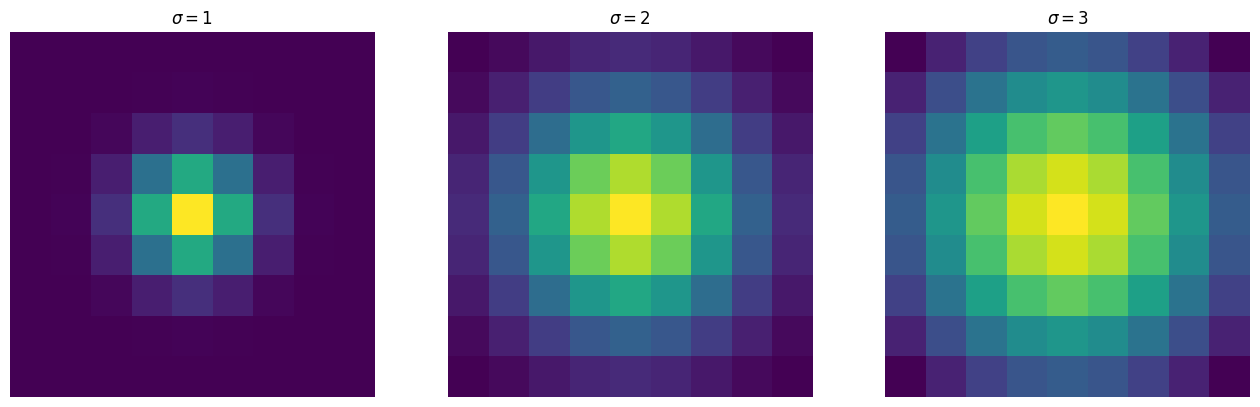

In [18]:
show_imgs([gauss_kernel(9, 1), gauss_kernel(9, 2), gauss_kernel(9, 3)], ["$\sigma=1$", "$\sigma=2$", "$\sigma=3$"])

# Демонстраційні зображення

In [19]:
highRes = image.imread("./HighRes.jpg")
lowRes = image.imread("./LowRes.png")
highContrast = image.imread("./HightContrast.png")
lowContrast = image.imread("./LowContrast.png")

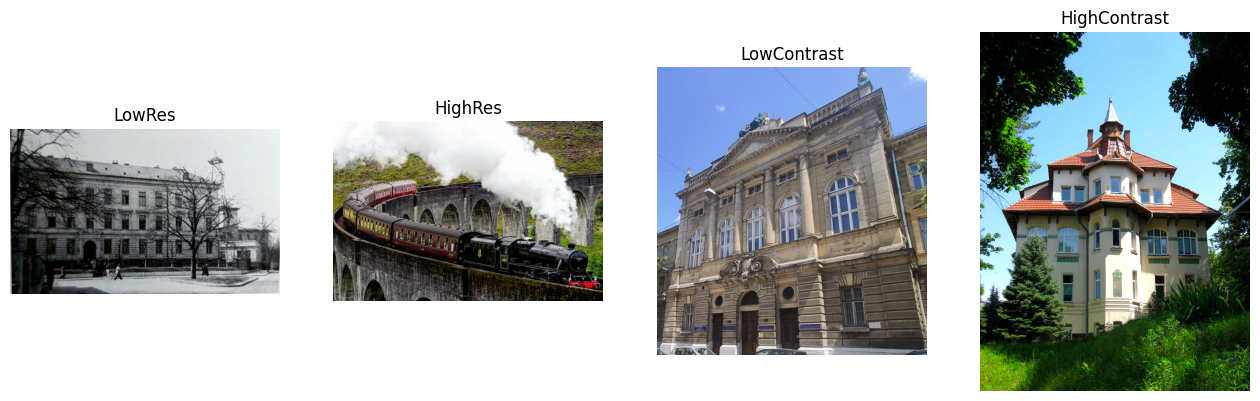

In [20]:
show_imgs([lowRes, highRes, lowContrast, highContrast], ["LowRes", "HighRes", "LowContrast", "HighContrast"])

# Застосування Гаусового фільтра

100%|██████████| 3/3 [00:05<00:00,  1.71s/it]


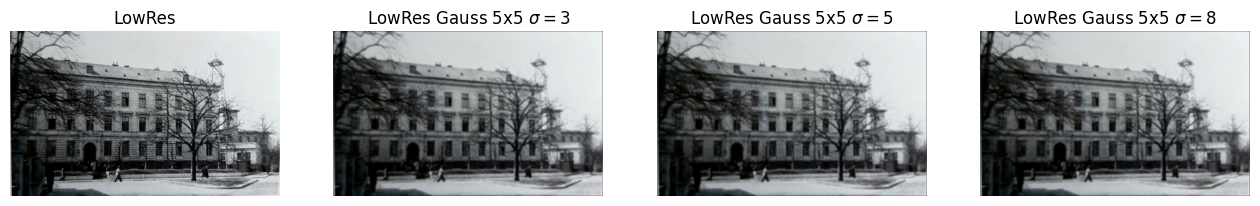

In [21]:
show_imgs([lowRes, apply_filter(lowRes, gauss_kernel(5, 3)), apply_filter(lowRes, gauss_kernel(5, 5)),
           apply_filter(lowRes, gauss_kernel(5, 8))],
          ["LowRes", "LowRes Gauss 5x5 $\sigma=3$", "LowRes Gauss 5x5 $\sigma=5$", "LowRes Gauss 5x5 $\sigma=8$"])

100%|██████████| 3/3 [00:51<00:00, 17.15s/it]


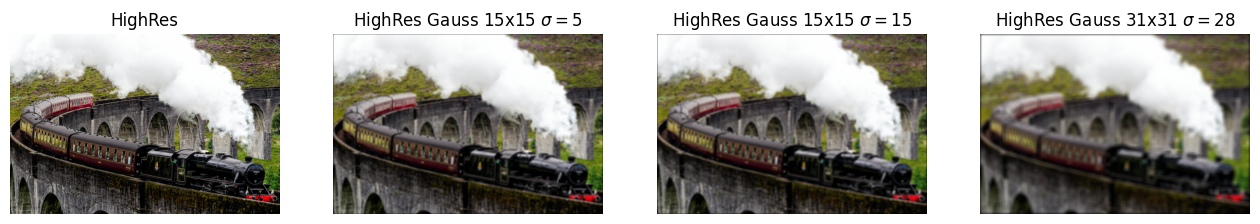

In [26]:
show_imgs([highRes, apply_filter(highRes, gauss_kernel(15, 5)), apply_filter(highRes, gauss_kernel(15, 15)),
           apply_filter(highRes, gauss_kernel(31, 28))],
          ["HighRes", "HighRes Gauss 15x15 $\sigma=5$", "HighRes Gauss 15x15 $\sigma=15$",
           "HighRes Gauss 31x31 $\sigma=28$"])

100%|██████████| 3/3 [00:23<00:00,  7.67s/it]


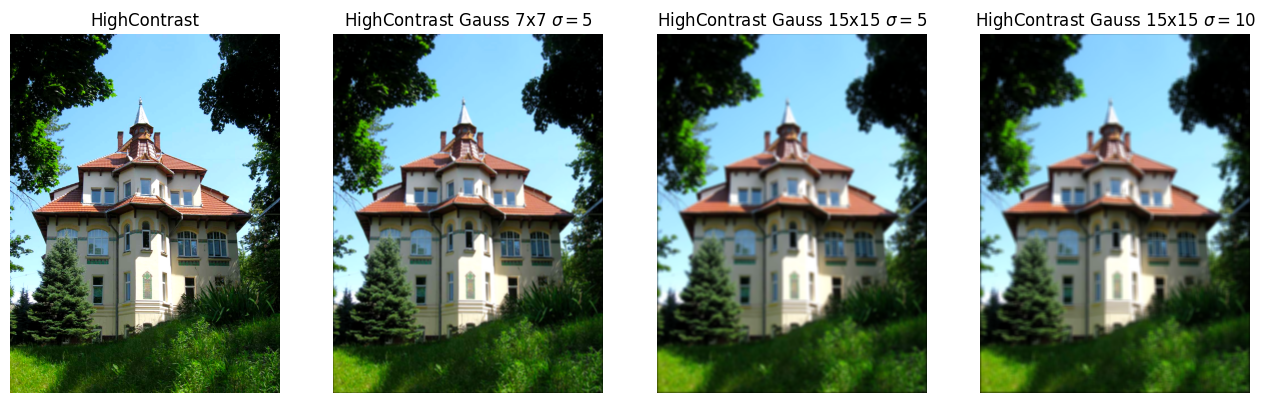

In [23]:
show_imgs(
    [highContrast, apply_filter(highContrast, gauss_kernel(7, 5)), apply_filter(highContrast, gauss_kernel(15, 5)), apply_filter(highContrast, gauss_kernel(15, 10))],
    ["HighContrast", "HighContrast Gauss 7x7 $\sigma=5$", "HighContrast Gauss 15x15 $\sigma=5$",
     "HighContrast Gauss 15x15 $\sigma=10$"])

100%|██████████| 3/3 [01:20<00:00, 26.75s/it]


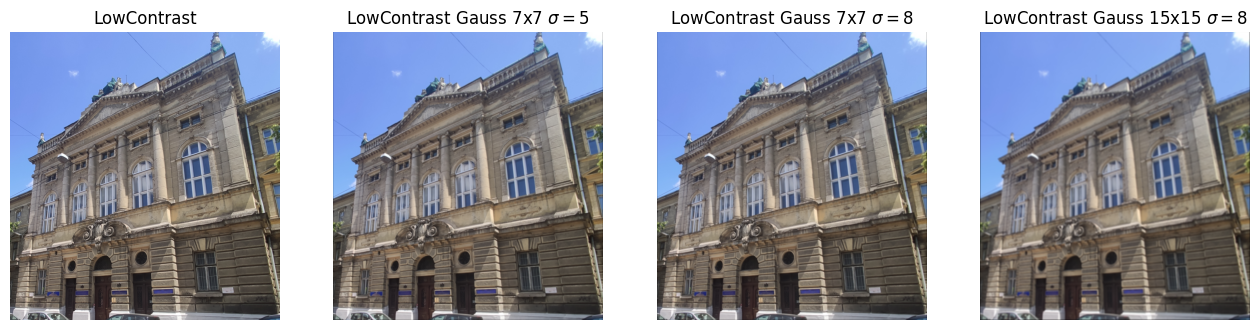

In [24]:
show_imgs([lowContrast, apply_filter(lowContrast, gauss_kernel(7, 5)), apply_filter(lowContrast, gauss_kernel(7, 8)),
           apply_filter(lowContrast, gauss_kernel(15, 8))],
          ["LowContrast", "LowContrast Gauss 7x7 $\sigma=5$", "LowContrast Gauss 7x7 $\sigma=8$",
           "LowContrast Gauss 15x15 $\sigma=8$"])

100%|██████████| 3/3 [01:19<00:00, 26.46s/it]


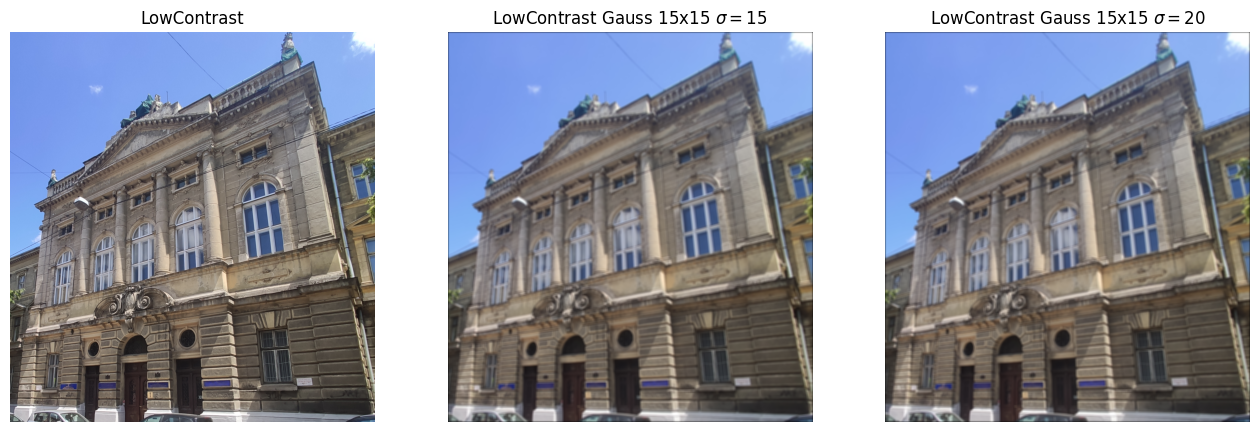

In [25]:
show_imgs([lowContrast, apply_filter(lowContrast, gauss_kernel(15, 15)), apply_filter(lowContrast, gauss_kernel(15, 20))],
          ["LowContrast", "LowContrast Gauss 15x15 $\sigma=15$", "LowContrast Gauss 15x15 $\sigma=20$"])